# Analyse de questionnaire : enquête sur les pratiques numériques des chercheurs

&#127919; **Objectif du notebook** : présenter les différentes étapes d'analyse des données d'une enquête par questionnaire à partir des données "brutes". Cela correspond au chargement, à la transformation et à l'analyse statistique de données quantitatives et qualitatives.

&#128218; **Données** : Enquête 2020  **State of Open Science Practices in France**  *Mariannig Le Béchec - Aline Bouchard - Philippe Charrier - Claire Denecker - Gabriel Gallezot - Stéphanie Rennes [mise à disposition sur la plateforme Zenodo](https://zenodo.org/record/5827206) qui a donné lieu à un* [rapport](https://hal.archives-ouvertes.fr/hal-03545512v1).

&#10067; **Question de recherche**: identifier des profils d'utilisateurs de certains outils numériques.

<div class="alert alert-block alert-warning">

&#10148; Notebook construit selon un modèle narratif linéaire exécutable ; <br>
    
&#10148; Priorité donnée à la lisibilité en détaillant les étapes (forte verbosité ; une cellule par étape) ; <br>

&#10148; Application des bonnes pratiques de programmation en langage Python &#128013; (structure avec [Cookiecutter Data Science](https://drivendata.github.io/cookiecutter-data-science/#directory-structure) et [Black](https://black.readthedocs.io/en/stable/index.html) pour le code) ; <br>
   
&#10148; Séparation données/traitement (entre les données brutes et le code, et dans le code) ; <br>
        
&#10148; Recherche d'un équilibre entre minimisation du nombre de bibliothèques et facilité d'usage ; <br>
            
&#10148; Documentation du code respectant les standards ([numpydoc docstrings](https://numpydoc.readthedocs.io/en/latest/format.html) utilisé notamment par [scikit-learn](https://scikit-learn.org/stable/)); <br>
    
&#10148; Mention explicite des versions de bibliothèques utilisées ; <br>

</div>

## Contexte

### Données

Données ouvertes &#128275; disponibles sur : https://zenodo.org/record/5827206

&#9888; Elles sont directement accessibles en format CSV (du texte) et donc facile à charger directement avec la bibliothèque *Pandas* qui permet de manipuler des tableaux. On utilise donc l'url vers le fichier CSV.

&#9888; Il y a deux fichiers différents : un pour les données et un pour les métadonnées (description des variables)

### Démarche  générale

Les principales étapes de ce Notebook sont : 

1. Charger les données, les explorer et les transformer pour permettre les analyses
2. Réaliser des analyses spécifiques associées à des questions de recherche
3. Produire des résultats diffusables (tableaux et visualisations)

### Choix de bibliothèques

L'analyse de données de questionnaire en sciences sociales nécessite trois grands types d'outils :

1. La manipulation de données tabulaires, facilité par la bibliothèque `Pandas`
2. Les traitements statistiques plus ou moins complexes associés à des bibliothèques génériques (`Statsmodels`, `Scikit-learn`) ou à des bibliothèques plus spécifiques et/ou plus récentes (`Prince`, `Pyshs`)
3. La visualisation des résultats, avec des bibliothèques génériques (`Matplotlib`) ou spécifiques (`Seaborn`)

### Chargement des bibliothèques

In [89]:
# Pour la manipulation de tableaux
import pandas as pd

# Pour la visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

# Pour les statistiques
import pyshs
import prince

# Pour la classification
from sklearn.cluster import AgglomerativeClustering

# Enlever les warnings
import warnings
warnings.filterwarnings("ignore")

## 1. Transformer les données

### 1.1 Récupération des données

Nous chargeons les données en format CSV directement à partir des sources en ligne. Il y a deux fichiers différents : le tableau de données, chargé dans la variable `data`, et les métadonnées, chargé dans la variable `meta`.

In [59]:
# Données
data = pd.read_csv(
    "https://zenodo.org/record/5827206/files/SOSP_Export_base%20de%20donn%C3%A9es%20diffusable.csv"
)

# Métadonnées
meta = pd.read_csv(
    "https://zenodo.org/record/5827206/files/SOSP_metadonnees_variables.csv"
)

### 1.2 Mise en forme

La première étape est de regarder les données existantes (soit avec un tableur, soit directement dans le Notebook)

In [60]:
data.head()

Id                     contexte_travail  \
0   1  nous sommes entre 6 et 10 personnes   
1   2     nous sommes plus de 50 personnes   
2   3   nous sommes entre 2 et 5 personnes   
3   4   nous sommes entre 2 et 5 personnes   
4   5   nous sommes entre 2 et 5 personnes   

                                  fonction_recherche  \
0  professeur / professeure des universités et as...   
1                ingénieur / ingénieure de recherche   
2     maître / maîtresse de conférences et assimilés   
3  directeur / directrice de recherche (CNRS, INS...   
4           doctorant / doctorante (y compris CIFRE)   

        statut_professionnel statut_professionnel_Autre  annee_premiere_publi  \
0  fonctionnaire ou assimilé                        NaN                  1995   
1                     en CDI                        NaN                  2005   
2  fonctionnaire ou assimilé                        NaN                  2006   
3  fonctionnaire ou assimilé                        NaN                  1989   
4                     en CDD                        NaN                  2015   

             Systeme_exploitation Usage_telephone_mobile  \
0                         Windows               rarement   
1                         Windows               rarement   
2                         Windows                parfois   
3  Windows;autres OS (Android...)                souvent   
4                           MacOS                souvent   

  Outils_gestion_travail_av_confinement_visioconférence  \
0                                            parfois      
1                                            parfois      
2                                           rarement      
3                                           rarement      
4                                           rarement      

  Outils_gestion_travail_av_confinement_planification_RDV  ...  \
0                                            souvent       ...   
1                                            parfois       ...   
2                                            souvent       ...   
3                                            souvent       ...   
4                                            parfois       ...   

  Souhait_partage_donnees_produites_discipline  \
0                                          oui   
1                                          oui   
2                                          oui   
3                                          oui   
4                                          oui   

  Souhait_partage_donnees_produites_pays_continent  \
0                                              oui   
1                                              oui   
2                                              oui   
3                                              oui   
4                                              oui   

  Souhait_partage_donnees_produites_domaine_economique  \
0                                                oui     
1                                                oui     
2                                                oui     
3                                                non     
4                                                oui     

  Souhait_partage_donnees_produites_secteur_associatif  \
0                                                oui     
1                                                oui     
2                                                oui     
3                                                non     
4                                                oui     

  Souhait_partage_donnees_produites_sans_restriction  \
0                                                oui   
1                                                oui   
2                                                oui   
3                                                non   
4                                                oui   

     compatibilite_diffusion_partage evolutions_pratiques_numeriques  \
0                                oui                  je

Regardons aussi les métadonnées.

In [66]:
meta.head()

Titre Listes des variables avec les questions et modalités associées  \
0      Objet   Enquête SOSP-FR _ Enquête sur les usages relat...               
1    Auteurs   Le Béchec M. Bouchard A. Denecker C. Charrier ...               
2      Résumé  L’enquête State of Open Science Practices in F...               
3  Discipline   Sciences de l’information et de la communication               
4   Mots-clés  Open science ; open data ; digital practices ;...               

  Unnamed: 2 Unnamed: 3 Unnamed: 4  
0        NaN        NaN        NaN  
1        NaN        NaN        NaN  
2        NaN        NaN        NaN  
3        NaN        NaN        NaN  
4        NaN        NaN        NaN

Nous constatons que le fichier de métadonnées contient et mélange des éléments descriptifs de l'enquête et les questions. Nous sommes intéressés à récupérer l'information entre le nom de la colonne et l'intitulé de la question. Cependant, cette information ne commence qu'à la ligne 31. Nous sélectionnons donc uniquement les lignes à partir de la ligne 31, nous ne gardons que les deux premières colonnes, que nous renommons, puis nous mettons le nom des variables en index.

In [90]:
questions = meta[31:]  # le tableau des questions ne commence qu'à la ligne 31
questions = questions[questions.columns[0:2]]  # garder les deux premières colonnes
questions.columns = ["variable", "question"]  # renommer les colonnes
questions = questions.set_index("variable")  # mettre le nom en index
questions.head()

question
variable                                                                     
ID                                                                        NaN
contexte_travail            Habituellement, pour une opération de recherch...
fonction_recherche              Quelle est votre fonction dans la recherche ?
statut_professionnel                    Quel est votre statut professionnel ?
statut_professionnel_autre                   Si, autre pouvez-vous préciser ?

Nos données et nos métadonnées sont transformées dans un format utilisable. Il est maintenant possible de les explorer.

### 1.3 Exploration initiale

Les méthodes des tableaux `Pandas` permettent d'explorer rapidement les données, notamment en vue du recodage des variables d'intérêt

Nous pouvons regarder la question associée à une variable en regardant la valeur associée à la ligne correspondante du tableau de métadonnées. La méthode `loc` permet d'identifier un élément (soit par l'index, soit par l'index et le nom de la colonne)

In [72]:
questions.loc["statut_professionnel"]

question    Quel est votre statut professionnel ?
Name: statut_professionnel, dtype: object

Nous regardons la distribution d'une variable avec la méthode `value_counts`.

In [9]:
data["statut_professionnel"].value_counts()

fonctionnaire ou assimilé         711
en CDI                            109
contrat doctoral                   99
en CDD                             95
post-doc                           30
travailleur indépendant            20
doctorant non financé               7
chômage                             6
retraité                            5
professeur / chercheur émérite      3
autre                               2
vacataire                           2
Name: statut_professionnel, dtype: int64

Nous pouvons le faire pour une autre variable.

In [8]:
data["sexe"].value_counts()

un homme                       565
une femme                      480
je ne souhaite pas répondre     44
Name: sexe, dtype: int64

Nous pouvons aussi faire une exploration visuelle de la variable numérique de l'année de première publication avec les méthodes graphiques des tableaux `Pandas`, ici `hist`. Comme c'est uniquement pour voir la distribution, nous ne rentrons pas dans le détail de la figure (titre, etc.).

<AxesSubplot:>

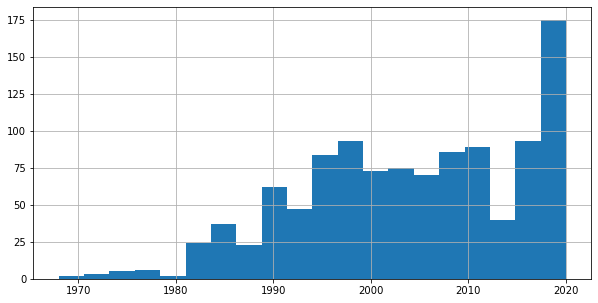

In [10]:
data["annee_premiere_publi"].hist(bins=20, figsize=(10, 5))

Pour avoir des tableaux comme les tri à plats davantage lisibles, il est possible d'utiliser des bibliothèques dédiées comme `Pyshs` pour les tableaux.

In [92]:
pyshs.tri_a_plat(data, "statut_professionnel")

Effectif  Pourcentage (%)
autre                                2.0              0.2
chômage                              6.0              0.6
contrat doctoral                    99.0              9.1
doctorant non financé                7.0              0.6
en CDD                              95.0              8.7
en CDI                             109.0             10.0
fonctionnaire ou assimilé          711.0             65.3
post-doc                            30.0              2.8
professeur / chercheur émérite       3.0              0.3
retraité                             5.0              0.5
travailleur indépendant             20.0              1.8
vacataire                            2.0              0.2
Total                             1089.0            100.1

Pour cette variable du statut professionnel, il y a beaucoup de modalités différentes. Un recodage pourra être nécessaire pour diminuer le nombre de modalités, par exemple en mettant dans la catégorie `autre` les modalités ayant de petits effectifs.

### 1.4 Formulation d'axes d'analyse

#### 1.4.1 Démarche générale

L'exploration des données et les traitements itératifs amènent à formuler des pistes de recherche. 

Dans le cas de la réutilisation de données, il y a deux choix :

- identifier les questions des chercheurs ayant produit ces données pour se replacer dans la perspective de l'enquête initiale et la prolonger
- explorer de nouveaux axes mais à partir des ressources constituées pour d'autres questions

Concrètement, cela signifie construire un plan d'analyse :

- identification des variables à utiliser
- choix des recodages
- traitements statistiques à réaliser
- figures et tableaux finalisés à produire

#### 1.4.2 Problématique spécifique

Nous pouvons formuler une question spécifique au terme de cette exploration : 

> **Peut-on identifier des profils d'usages d'outils numériques ? Quels sont les principaux déterminants de ces profils ?**

Les variables définissant l'usage numérique des chercheurs que nous retenons pour l'analyse sont alors les suivantes :

- Le système d'exploitation utilisé : `variable Systeme_exploitation`
- Usage du téléphone mobile : `Usage_telephone_mobile`
- NA Les conditions de découverte des outils : `decouverte_outils_num_travail` (réponses multiples) 
- Le type de données utilisées :  `type_donnees_nombres_valeurs_numeriques`, `type_donnees_textes`, `type_donnees_images`, `type_donnees_videos`, `type_donnees_ 3D`, `type_donnees_sons`
- Réutilisation de données : `Reutilisation_donnees`
- L'usage de différents outils : `types_logiciels_production_donnees`, `Usage_outils_nettoyage`,`Usage_outils_analyse`, `Usage_outils_visualisation`, `usage_outils_systemes_qualif_donnees`, `Outils_redaction_documents_traitement_texte`, `Outils_redaction_documents_traitement_texte_ligne`, `Outils_redaction_documents_editeur_Latex`, `Outils_redaction_documents_balisage`, `Outils_redaction_documents_aide_redaction`, `Outils_redaction_documents_formats_specifiques`, `Outils_redaction_documents_gestionnaire_references`, `Outils_redaction_documents_traduction`, `Outils_redaction_documents_PAO`
- Les outils utilisés en réponses libres : `logiciel_production_donnees`, `outils_nettoyage`, `Outils_analyses`, `Outils_visualisation`,`outils_production_figure`

Les caractéristiques permettant de définir les individus sont :

- `fonction_recherche`
- `statut_professionnel`
- `annee_premiere_publi`
- `sexe`
- `disciplines_9niv`
- `annee_de_naissance-recod10niv`

### 1.5 Moment de recodage des variables

Il y a différents recodages de variables à réaliser pour permettre de rendre lisible les résultats : soit de réduire le nombre de modalités d'une variable, soit de séparer des réponses multiples en une série de variables de réponses simples.

Prenons le cas de la variable sur les systèmes d'exploitations utilisés.

In [12]:
data["Systeme_exploitation"].value_counts()

Windows                                           476
MacOS                                             186
Linux                                             146
Windows;Linux                                      82
Windows;MacOS                                      67
MacOS;Linux                                        38
Windows;MacOS;Linux                                25
Windows;autres OS (Android...)                     17
Windows;MacOS;autres OS (Android...)               11
Linux;autres OS (Android...)                        9
Windows;MacOS;Linux;autres OS (Android...)          7
Windows;Linux;autres OS (Android...)                7
autres OS (Android...)                              3
MacOS;Linux;autres OS (Android...)                  2
MacOS;autres OS (Android...)                        2
autres Unix                                         2
Windows;Linux;autres Unix                           2
Windows;autres Unix                                 2
Linux;autres Unix           

Toutes les combinaisons ne sont pas intéressantes, et il serait intéressant de savoir qui utilise Linux, Windows, Mac ; puis si l'usage est exclusif ou pas. Nous créons une variable par système d'exploitation, et une variable pour identifier si c'est exclusif ou pas. Nous utilisons pour cela la méthode `str.contains` qui permet de savoir si une chaîne de caractère est contenu dans la cellule du tableau.

On se retrouve donc avec 4 colonnes différentes à la place de celle initiale.

In [13]:
data["OS_windows"] = data["Systeme_exploitation"].str.contains("Windows")
data["OS_linux"] = data["Systeme_exploitation"].str.contains("Linux|Unix")
data["OS_mac"] = data["Systeme_exploitation"].str.contains("Mac")
data["OS_multiples"] = data["Systeme_exploitation"].str.contains(";")

Il est aussi possible de recoder une variable, par exemple pour éduire la taille des labels et les regrouper, comme ici pour la discipline d'appartenance.

In [14]:
reco = {
    "Lettres et Arts": "SHS",
    "Sciences humaines": "SHS",
    "Sciences sociales": "SHS",
    "Physique, Sciences de la terre et de l'Univers": "Physique & Univers",
}

data["disciplines_reco"] = data["disciplines_9niv"].replace(reco)

Il est important ensuite de vérifier le recodage obtenu avant d'intégrer la variable dans l'analyse.

In [15]:
data["disciplines_reco"].value_counts()

SHS                             493
Mathématiques, Informatiques    138
Sciences du vivant              138
Physique & Univers              103
Science de l'ingénieur           91
Chimie, Matériaux                59
Médecine                         54
Name: disciplines_reco, dtype: int64

#### Recodage de l'ensemble des variables d'intérêt

Il s'agit de faire ce travail d'analyse et de recodage pour chaque variable. Cela aboutit à ce bloc de recodage.

Cette cellule est un peu plus grande que les autres. Il faut avoir en tête que ce bloc est construit de manière itérative pour chaque variable à part, et les lignes sont ajoutées les unes sous les autres. Cela prend du temps mais une fois le type de recodage réalisé, il est formalisé et facilement lisible/modifiable.

Pour résumer, plusieurs stratégies sont utilisées :

- remplacement des modalités avec `replace` et un dictionnaire
- présence d'une modalité avec la méthode `str.contains`
- passage de variable numérique à qualitative avec `pd.cut`

In [93]:
# Recodage du genre
reco = {
    "un homme": "Homme",
    "une femme": "Femme",
    "je ne souhaite pas répondre": "Pas de réponse",
}
data["sexe"] = data["sexe"].replace(reco)

# Recodage de l'âge
reco = {
    "61 à 65 ans": "61-65",
    "46 à 50 ans": "46-50",
    "36 à 40 ans": "36-40",
    "56 à 60 ans": "56-60",
    "31 à 35 ans": "31-35",
    "25 à 30 ans": "25-30",
    "51 à 55 ans": "51-55",
    "41 à 45 ans": "41-45",
    "66 ans et plus": "66+",
    "moins de 25 ans": "18-25",
}
data["age"] = data["annee_de_naissance-recod10niv"].replace(reco)

# Recodage de la discipline
reco = {
    "Lettres et Arts": "SHS",
    "Sciences humaines": "SHS",
    "Sciences sociales": "SHS",
    "Physique, Sciences de la terre et de l'Univers": "Physique & Univers",
}
data["disciplines_reco"] = data["disciplines_9niv"].replace(reco)

# Passage de l'année de première publi en variable qualitative
data["annee_premiere_publi_quali"] = pd.cut(
    data["annee_premiere_publi"], range(1930, 2030, 10)
)

# Recodage du statut/fonction
reco = {
    "professeur / professeure des universités et assimilés": "EC/C cat A",
    "ingénieur / ingénieure de recherche": "Ingénieur",
    "maître / maîtresse de conférences et assimilés": "EC/C cat B",
    "directeur / directrice de recherche (CNRS, INSERM, INRAE, CNES...)": "EC/C cat A",
    "doctorant / doctorante (y compris CIFRE)": "Doctorant",
    "ingénieur / ingénieure d'études": "Ingénieur",
    "chargé / chargée de recherche (CNRS, INSERM, INRAE, CNES...)": "EC/C cat B",
    "chercheur / chercheure dans le secteur privé (ingénieur R&D, consultant, expert, chef de projet)": "Privé R&D",
    "responsable de service R&D dans le secteur privé": "Privé R&D",
}
data["fonction"] = data["fonction_recherche"].replace(reco)

reco = {
    "fonctionnaire ou assimilé": "fonctionnaire",
    "en CDI": "cdi",
    "en CDD": "cdd",
    "travailleur indépendant": "autre",
    "contrat doctoral": ":cdd",
    "retraité": "autre",
    "post-doc": "cdd",
    "doctorant non financé": "autre",
    "professeur / chercheur émérite": "autre",
    "chômage": "autre",
    "autre": "autre",
    "vacataire": "autre",
}
data["statut"] = data["statut_professionnel"].replace(reco)

# Normalisation des recodage avec un ordre en regroupant des modalités
reco = {
    "rarement": "2-Parfois",
    "parfois": "2-Parfois",
    "souvent": "1-Souvent",
    "jamais": "3-Jamais",
    "toujours": "1-Souvent", # choix de réunir toujours et souvent
}

data["telephone_mobile"] = data["Usage_telephone_mobile"].replace(reco)
data["donnees_numeriques"] = data["type_donnees_nombres_valeurs_numeriques"].replace(
    reco
)
data["donnees_textes"] = data["type_donnees_textes"].replace(reco)
data["donnees_images"] = data["type_donnees_images"].replace(reco)
data["donnees_videos"] = data["type_donnees_videos"].replace(reco)
data["donnees_3D"] = data["type_donnees_ 3D"].replace(reco)
data["donnees_sons"] = data["type_donnees_sons"].replace(reco)
data["donnees_reutilisation"] = data["Reutilisation_donnees"].replace(reco)
data["usage_outils_nettoyage"] = data["Usage_outils_nettoyage"].replace(reco)
data["usage_outils_analyse"] = data["Usage_outils_analyse"].replace(reco)
data["usage_outils_visualisation"] = data["Usage_outils_visualisation"].replace(reco)
data["usage_outils_qualification"] = data[
    "usage_outils_systemes_qualif_donnees"
].replace(reco)
data["usage_outils_traitement_texte"] = data[
    "Outils_redaction_documents_traitement_texte"
].replace(reco)
data["usage_outils_traitement_texte_ligne"] = data[
    "Outils_redaction_documents_traitement_texte_ligne"
].replace(reco)
data["usage_outils_latex"] = data["Outils_redaction_documents_editeur_Latex"].replace(
    reco
)
data["usage_outils_balisage"] = data["Outils_redaction_documents_balisage"].replace(
    reco
)
data["usage_outils_aide_redaction"] = data[
    "Outils_redaction_documents_aide_redaction"
].replace(reco)
data["usage_outils_aide_redaction_specifique"] = data[
    "Outils_redaction_documents_formats_specifiques"
].replace(reco)
data["usage_outils_references"] = data[
    "Outils_redaction_documents_gestionnaire_references"
].replace(reco)
data["usage_outils_traduction"] = data["Outils_redaction_documents_traduction"].replace(
    reco
)
data["usage_outils_pao"] = data["Outils_redaction_documents_PAO"].replace(reco)
data["usage_outils_figure"] = data["outils_production_figure"].replace(reco)

# recodage d'une colonne de choix multiples
reponses = {
    "des logiciels créés à cette fin (seul ou avec des collègues)": "logiciels_dedies",
    "des logiciels gratuits avec des fonctionnalités premium": "logiciels_freemium",
    "des logiciels internes à mon organisation": "logiciels_internes",
    "des logiciels issus d'un projet de recherche": "logiciels_projet",
    "des logiciels libres et gratuits": "logiciels_libres",
    "des logiciels partiellement ou complètement gratuits mais propriétaires": "logiciels_proprietaires",
    "des logiciels payants": "logiciels_payants",
    'des logiciels payants "crackés"': "logiciels_crackes",
    "des logiciels version d'essai ou démo": "logiciels_demo",
}
# Pour chaque ligne regarder si la réponse est présente (Vraie) ou absente (Fausse)
for i in reponses:
    data[reponses[i]] = (
        data["types_logiciels_production_donnees"]
        .str.contains(i)
        .fillna(False)
        .apply(str)
    )

# Recodage des systèmes d'exploitation
data["OS_windows"] = data["Systeme_exploitation"].str.contains("Windows").apply(str)
data["OS_linux"] = data["Systeme_exploitation"].str.contains("Linux|Unix").apply(str)
data["OS_mac"] = data["Systeme_exploitation"].str.contains("Mac").apply(str)
data["OS_multiples"] = data["Systeme_exploitation"].str.contains(";").apply(str)

**Remarque** : nous réutilisons des données, elles ne sont pas parfaitement adaptées à ce que nous voudrions faire. Ainsi, la fonction/statut professionnel ne semble pas découler d'une grille très cohérente (être postdoc est un CDD par exemple, et les deux modalités existent). Certains recodages correctifs pourraient être envisagés.

## 2. Analyse descriptive des données

Une fois que le travail de recodage sur les variables réalisé, il est possible de produire les statistiques descriptives par variable (analyse univariée) mais aussi les croisements entre les variables (analyse bivariée).

Cela consiste à représenter les données traitées sous forme de tableaux et de visualisations.

### 2.1 Univarié : tri à plat et tableaux

Regardons les pratiques d'usage des données, pour une et ensuite pour l'ensemble.

In [17]:
pyshs.tri_a_plat(data, "donnees_numeriques")

Effectif  Pourcentage (%)
1-Souvent     676.0             62.1
2-Parfois     265.0             24.3
3-Jamais      148.0             13.6
Total        1089.0            100.0

Composons un tableau plus complexe en utilisant la flexibilité de `Pandas`.

In [18]:
var = [
    "donnees_numeriques",
    "donnees_textes",
    "donnees_images",
    "donnees_videos",
    "donnees_3D",
    "donnees_sons",
]

pd.concat({c: pyshs.tri_a_plat(data, c)["Pourcentage (%)"] for c in var}, axis=1)

donnees_numeriques  donnees_textes  donnees_images  donnees_videos  \
1-Souvent                62.1            61.9            37.4             9.4   
2-Parfois                24.3            21.7            35.2            36.6   
3-Jamais                 13.6            16.4            27.5            54.0   
Total                   100.0           100.0           100.1           100.0   

           donnees_3D  donnees_sons  
1-Souvent         6.2           8.8  
2-Parfois        17.4          17.6  
3-Jamais         76.5          73.6  
Total           100.1         100.0

Dans notre corpus, les données de type images, vidéo, son et 3D sont comparativement moins utilisées que les données numériques et textuelles.

### 2.2 Croisement de variables

Croiser des variables permet de commencer à s'intéresser aux profils et aux relations entre les variables.

#### Discipline et type de donnnées #### 

Il existe plusieurs manières d'obtenir un tableau croisé. La bibliothèque `Pandas` permet directement d'avoir un tableau croisé en effectif avec `crosstab` et les deux colonnes.

In [19]:
pd.crosstab(data["disciplines_reco"], data["donnees_numeriques"])

donnees_numeriques            1-Souvent  2-Parfois  3-Jamais
disciplines_reco                                            
Chimie, Matériaux                    45          9         5
Mathématiques, Informatiques         89         28        21
Médecine                             49          4         1
Physique & Univers                   97          6         0
SHS                                 190        188       115
Science de l'ingénieur               77         14         0
Sciences du vivant                  123         13         2

Il est aussi possible de normaliser par ligne ou colonne, en divisant par le total de la ligne/colonne. Ici, nous faisons un tableau en fréquence par ligne, en spécifiant quelques options.

In [20]:
pd.crosstab(
    data["disciplines_reco"],
    data["donnees_numeriques"],
    normalize="index",
    margins=True,
)

donnees_numeriques            1-Souvent  2-Parfois  3-Jamais
disciplines_reco                                            
Chimie, Matériaux              0.762712   0.152542  0.084746
Mathématiques, Informatiques   0.644928   0.202899  0.152174
Médecine                       0.907407   0.074074  0.018519
Physique & Univers             0.941748   0.058252  0.000000
SHS                            0.385396   0.381339  0.233266
Science de l'ingénieur         0.846154   0.153846  0.000000
Sciences du vivant             0.891304   0.094203  0.014493
All                            0.622677   0.243494  0.133829

Si nous voulons maintenant croiser une série de variable, l'ensemble des variables définies dans la variable `var`, la fonction `tableau_croise_multiple` de la bibliothèque `Pyshs` permet de le faire rapidement, en calculant dans la foulée un test de $\chi2$ pour chaque tableau.

In [21]:
pyshs.tableau_croise_multiple(data, "disciplines_reco", var, axis=1)

Chimie, Matériaux  \
Variable                       Modalités                     
donnees_numeriques (p = 0.000) 1-Souvent      45.0 (76.3%)   
                               2-Parfois       9.0 (15.3%)   
                               3-Jamais         5.0 (8.5%)   
                               Total             59 (100%)   
donnees_textes (p = 0.000)     1-Souvent        38 (64.4%)   
                               2-Parfois        13 (22.0%)   
                               3-Jamais          8 (13.6%)   
                               Total             59 (100%)   
donnees_images (p = 0.000)     1-Souvent        26 (44.1%)   
                               2-Parfois        22 (37.3%)   
                               3-Jamais         11 (18.6%)   
                               Total             59 (100%)   
donnees_videos (p = 0.000)     1-Souvent        0.0 (0.0%)   
                               2-Parfois      17.0 (28.8%)   
                               3-Jamais       42.0 (71.2%)   
                               Total             59 (100%)   
donnees_3D (p = 0.000)         1-Souvent          4 (6.8%)   
                               2-Parfois        15 (25.4%)   
                               3-Jamais         40 (67.8%)   
                               Total             59 (100%)   
donnees_sons (p = 0.000)       1-Souvent        0.0 (0.0%)   
                               2-Parfois       7.0 (11.9%)   
                               3-Jamais       52.0 (88.1%)   
                               Total             59 (100%)   

                                         Mathématiques, Informatiques  \
Variable                       Modalités                                
donnees_numeriques (p = 0.000) 1-Souvent                 89.0 (64.5%)   
                               2-Parfois                 28.0 (20.3%)   
                               3-Jamais                  21.0 (15.2%)   
                               Total                       138 (100%)   
donnees_textes (p = 0.000)     1-Souvent                   61 (44.2%)   
                               2-Parfois                   29 (21.0%)   
                               3-Jamais                    48 (34.8%)   
                               Total                       138 (100%)   
donnees_images (p = 0.000)     1-Souvent                   32 (23.2%)   
                               2-Parfois                   36 (26.1%)   
                               3-Jamais                    70 (50.7%)   
                               Total                       138 (100%)   
donnees_videos (p = 0.000)     1-Souvent                   8.0 (5.8%)   
                               2-Parfois                 26.0 (18.8%)   
                               3-Jamais                 104.0 (75.4%)   
                               Total                       138 (100%)   
donnees_3D (p = 0.000)         1-Souvent                     6 (4.3%)   
                               2-Parfois                   20 (14.5%)   
                               3-Jamais                   112 (81.2%)   
                               Total                       138 (100%)   
donnees_sons (p = 0.000)       1-Souvent                   4.0 (2.9%)   
                               2-Parfois                 17.0 (12.3%)   
                               3-Jamais                 117.0 (84.8%)   
                               Total                       138 (100%)   

                                              Médecine Physique & Univers  \
Variable                       Modalités                                    
donnees_numeriques (p = 0.000) 1-Souvent  49.0 (90.7%)       97.0 (94.2%)   
                               2-Parfois    4.0 (7.4%)         6.0 (5.8%)   
                               3-Jamais     1.0 (1.9%)         0.0 (0.0%)   
                               Total         54 (100%)         103 (100%)   
donnees_textes (p = 0.000)     1-Souvent    34 (63.0%)         35 (

### 2.3 Visualisations

Les premières visualisations sont faciles à produire avec les méthodes de `Pandas`, en ajoutant quelques informations.

<AxesSubplot:title={'center':'Utilisation de données textuelles'}>

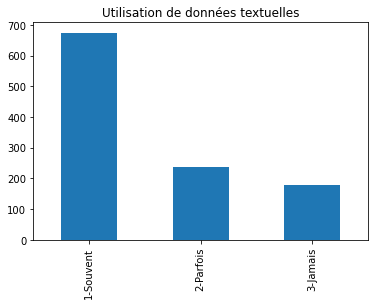

In [22]:
data["donnees_textes"].value_counts().plot(
    kind="bar", 
    title="Utilisation de données textuelles"
)

Cependant, ce graphique n'est pas encore très informatif, et il est possible de rajouter différentes options avec `Matplotlib`.

#### Production d'une visualisation un peu finalisée

Une figure nécessite généralement de définir plusieurs options, par exemple pour les couleurs, ou pour la sauvegarde dans un fichier dédié, ici en `png`.

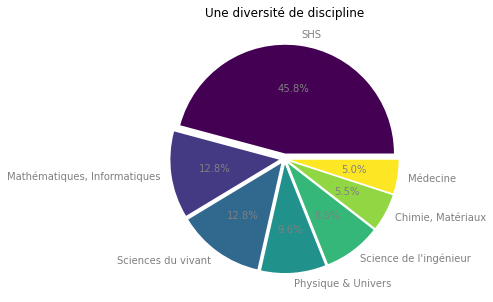

In [23]:
# Définir l'écart entre les parts (c'est à nous de définir)
exp = [0.05] * len(data["disciplines_reco"].dropna().unique())

# Graphique avec options (passé un peu de temps à chercher)
data["disciplines_reco"].value_counts().plot(
    kind="pie",
    cmap="viridis",
    figsize=(5, 5),
    explode=exp,
    autopct="%1.1f%%",
    textprops={"color": "gray"},
)
# Finaliser et sauvegarder
plt.ylabel("")
plt.title("Une diversité de discipline")
plt.savefig("../results/Mon graphique.png", bbox_inches="tight")

Il est possible d'utiliser d'autres bibliothèques plus spécialisées pour la visualisation, qui conviendront potentiellement davantage aux objectifs recherchés. C'est le cas de la bibliothèque `Seaborn`.

In [24]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.violinplot(
    x="disciplines_reco", y="annee_premiere_publi", data=data, ax=ax, palette="Blues"
)
plt.xticks(rotation=45)
plt.title("Distribution des premières années de publication")
plt.show()

Pour les visualisations interactives : Plotly

&#9888; ça ne s'affiche pas sur Gitlab ! Il faut exécuter le notebook

In [94]:
plotly.offline.init_notebook_mode(connected=True)

# Afficher et compléter
df = pd.DataFrame(data["disciplines_reco"].value_counts())  # Construction des données
fig = px.pie(
    df, names=df.index, values="disciplines_reco", title="Une diversité de discipline"
)
fig.update_layout(
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="orange",
    title_font_size=30,
)
fig.show()

## 3. Classification de répondants sur leurs usages du numérique

L'analyse univariée/bivariée des données rend visible des profils d'usagers différents du numérique dans la recherche.

L'objectif est de constituer des profils d'usagers, donc de réaliser une classification.

Une **première solution** est d'utiliser une classification analytique en définissant les profils. Nous n'avons pas ici de théorie spécifique pour définir une telle classification, comme cela pourrait être le cas avec l'approche en termes de capitaux développé par Pierre Bourdieu pour modéliser les goûts culturels.

La **deuxième solution** est d'utiliser une stratégie de classification (`machine learning`) pour constituer des catégories. Plusieurs stratégies existent alors.

- souvent utilisé en SHS, la classification hiérarchiquee ascendante peut être le choix le plus évident
- une des autres méthodes de classification (il en existe de nombreuses)

Une petite difficulté se présente toutefois : nous avons des données catégorielles (de l'ordre du qualitatif) et les stratégies de classification portent sur des données quantitatives. Une transformation de nos données par analyse factorielle va permettre de passer d'un espace "qualitatif" à un espace "numérique" des données.

### 3.1 Analyse factorielle en Composante Multiple des données

Une décomposition en facteur correspond à la section d'un petit nombre de variables constituées de la combinaisons des variables initiales qui permet de résumer le plus possible les données. Dans le cas des variables catégorielles, il est fréquent de faire une Analyse factorielle en Composante Multiple, ou ACM. 

> Pour en savoir plus : RENISIO Yann, SINTHON Rémi, « L'analyse des correspondances multiples au service de l'enquête de terrain. Pour en finir avec le dualisme « quantitatif »/« qualitatif » », Genèses, 2014/4 (n° 97), p. 109-125. DOI : 10.3917/gen.097.0109. URL : https://www.cairn.info/revue-geneses-2014-4-page-109.htm


Définissons une liste des variables utilisées pour construire cette classification.

In [74]:
var_class = [
    "OS_windows",
    "OS_linux",
    "OS_mac",
    "OS_multiples",
    "donnees_numeriques",
    "donnees_textes",
    "donnees_images",
    "donnees_videos",
    "donnees_3D",
    "donnees_sons",
    "logiciels_dedies",
    "logiciels_freemium",
    "logiciels_internes",
    "logiciels_projet",
    "logiciels_libres",
    "logiciels_proprietaires",
    "logiciels_payants",
    "logiciels_crackes",
    "logiciels_demo",
    "telephone_mobile",
    "donnees_reutilisation",
    "usage_outils_nettoyage",
    "usage_outils_analyse",
    "usage_outils_visualisation",
    "usage_outils_qualification",
    "usage_outils_traitement_texte",
    "usage_outils_traitement_texte_ligne",
    "usage_outils_latex",
    "usage_outils_balisage",
    "usage_outils_aide_redaction",
    "usage_outils_aide_redaction_specifique",
    "usage_outils_references",
    "usage_outils_traduction",
    "usage_outils_pao",
]

Réalisation de l'analyse factorielle avec la bibliothèque `Prince` qui permet en quelques lignes d'obtenir une décomposition d'un tableau en facteurs. La documentation de `Prince` : https://github.com/MaxHalford/prince

In [95]:
# Définir le tableau des données que nous voulons décomposer (définies par les variables de var_class)
X = data[var_class]
# Initialisation du modèle avec 10 composantes de sortie
acm = prince.MCA(n_components=10)
# Application du modèle au tableau de données
acm = mca.fit(X)
# Afficharge des premières lignes de la projection du tableau
acm.row_coordinates(X).head()

0         1         2         3         4         5         6  \
0 -0.408167 -0.049781 -0.082568 -0.116569  0.214666 -0.291055 -0.108763   
1  0.436764 -0.691619  0.540873  1.021557  0.202634 -0.117377 -0.096210   
2 -0.179223  0.225579 -0.183822 -0.199734  0.222438  0.054428  0.138857   
3 -0.344208 -0.074564 -0.118252  0.066020 -0.310777 -0.261482  0.058161   
4 -0.161591 -0.189639  0.077184  0.015673 -0.077021  0.240278  0.144483   

          7         8         9  
0  0.059443  0.077237 -0.077963  
1  0.711657 -0.336594 -0.237440  
2  0.502605  0.074181 -0.147853  
3 -0.096788  0.220216 -0.029668  
4 -0.222276 -0.135461 -0.198604

Chaque axe a une pondération (son inertie) qui correspond à sa capacité à représenter l'ensemble des données (le total vaut 1). Cela permet de sélectionner le nombre d'axes à conserver pour représenter au mieux les données. Il est possible d'afficher la distribution des poids pour chaque axe : 

In [97]:
plt.plot(acm.explained_inertia_,"o-")
plt.show()

Position des modalités sur le premier axe ordonné (head pour avoir uniquement les premiers). Cela nous permet d'avoir une information sur les modalités les plus "extrêmes" qui donnent une information sur la signification de l'axe. Dans ce cas, le premier axe a à droite les répondant qui n'utilisent pas d'outils pour la visualisation, n'utilisent pas de données numériques, etc.

In [82]:
acm.column_coordinates(X)[0].sort_values().head()

usage_outils_visualisation_3-Jamais   -0.815447
donnees_numeriques_3-Jamais           -0.782535
usage_outils_analyse_3-Jamais         -0.633942
logiciels_libres_False                -0.587584
usage_outils_latex_3-Jamais           -0.507974
Name: 0, dtype: float64

Il est possible de se poser la même question pour le deuxième axe. Les répondants en bas de l'axe sont ceux qui utilisent souvent des outils d'aide à la rédaction, des logiciels freemium, ou encore des données sonores.

In [83]:
acm.column_coordinates(X)[1].sort_values().head()

usage_outils_aide_redaction_1-Souvent           -1.437014
usage_outils_aide_redaction_2-Parfois           -1.306494
logiciels_freemium_True                         -0.898727
usage_outils_traitement_texte_ligne_1-Souvent   -0.833085
donnees_sons_1-Souvent                          -0.788814
Name: 1, dtype: float64

La pratique est de visualiser les premiers axes de la décomposition pour avoir une idée de la distribution des répondants dans cet espace à deux dimensions et leurs proximités. On représente à la fois les répondants, et la position des modalités (moyenne des répondants associés).

In [84]:
ax = acm.plot_coordinates(
    X=X,
    figsize=(15, 8),
    show_row_points=True,
    row_points_size=10,
    show_column_points=True,
    column_points_size=30,
    show_column_labels=True,
    legend_n_cols=1,
)

plt.title("Représentation des deux premiers axes de l'Analyse des Correspondances Multiples")
plt.show()

Cette ACM est difficilement lisible, même s'il est possible de commencer à donner du sens aux axes (des usages spécifiques à droite et des pratiques moins outillées à gauche ; des données numériques en haut et des données surtout textuelles en bas).

Une analyse plus approfondie regarderait en détail les poids des variables associées à chacun des axes, et le lien entre ces modalités. Cela nécessite de revenir aux tableaux des coordonnées des variables projettées.

Une stratégie pour réduire la complexité est alors de construire des typologies.

Pour cela, une stratégie à partir de l'ACM est de réaliser une classification hiérarchique ascendante sur ACM : **Hierarchical Clustering on Principal Components**, ou HCPC. 

Une telle fonction existe de manière intégrée sous R mais pas sous Python. Dans ce cas, on réalise les deux étapes : l'ACM puis la classification : https://www.rdocumentation.org/packages/FactoMineR/versions/2.4/topics/HCPC

### 3.2 Classification hiérarchique ascendante pour produire des profils

Un premier temps est de réaliser une projection avec une ACM pour réduire le nombre de dimension (10 dans ce cas). On utilise la fonction `fit_transform` qui permet dans une même ligne d'appliquer le modèle et d'obtenir les données transformées.

In [86]:
Xt = acm.fit_transform(X)
modalities = acm.column_coordinates(X)

A partir des points projetés, on les regroupe par proximité deux à deux pour former un arbre des associations. Pour rendre cette classification visuelle, nous pouvons utiliser les outils de la bibliothèque `scipy`.

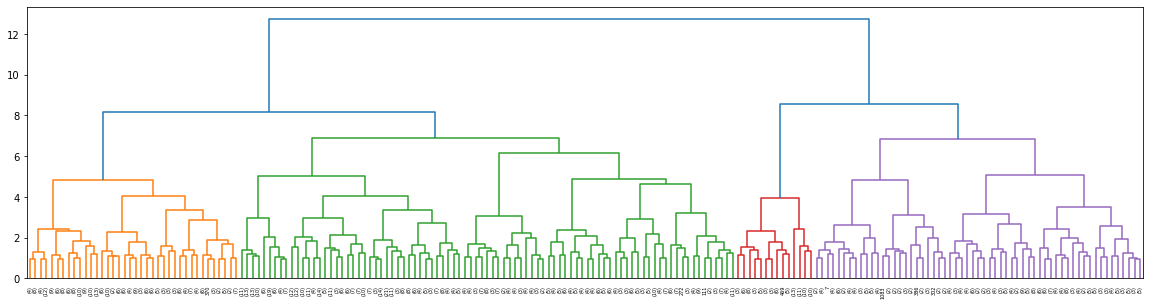

In [88]:
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.cluster.hierarchy import dendrogram

arbre = linkage(Xt, "ward")
fig, ax = plt.subplots(figsize=(20, 5))
t = dendrogram(
    arbre,
    distance_sort="ascending",
    p=200,
    ax=ax,
    truncate_mode="lastp",
    color_threshold=8,
)

A la lecture de ce diagramme, nous pouvons explorer le nombre de catégorie que nous souhaitons. Il est possible d'en distinguer 2 ou 3 ou 4. Augmenter le nombre de catégorie rend plus difficile leur interprétation.

Pour le calcul de la classification, nous utilisons la fonction de la bibliothèque `scikit-learn` (celle-ci produit le même résultat que `scipy` mais se présente sous une forme d'usage similaire à `Prince` rendant l'opération plus facile à lire).

Nous fixons le nombre de clusters à 3. D'autres configurations pourraient être explorées.

In [34]:
cluster = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
data["clusters"] = cluster.fit_predict(Xt)
data["clusters"].value_counts()

0    770
1    209
2    110
Name: clusters, dtype: int64

Avec cette classification, chaque répondant est attribué à une des trois catégories.

### 3.3 Analyse des profils

Une fois les profils calculés, il faut leur donner un sens. Le principe est alors de croiser les profils avec les différentes variables indépendantes pour identifier les corrélations, et donc le principe sous-jacent qui a conduit à ces regroupements.

Il est possible de regarder variable par variable les associations pour explorer.

In [36]:
pyshs.tableau_croise(data, "clusters", "disciplines_reco")

Chimie, Matériaux Mathématiques, Informatiques   Médecine  \
0             48 (6.3%)                    28 (3.7%)  46 (6.0%)   
1             10 (4.8%)                   59 (28.4%)   7 (3.4%)   
2              1 (1.0%)                   51 (48.6%)   1 (1.0%)   
Total         59 (5.5%)                  138 (12.8%)  54 (5.0%)   

      Physique & Univers          SHS Science de l'ingénieur  \
0              48 (6.3%)  421 (55.2%)              58 (7.6%)   
1             35 (16.8%)   59 (28.4%)              20 (9.6%)   
2             20 (19.0%)   13 (12.4%)             13 (12.4%)   
Total         103 (9.6%)  493 (45.8%)              91 (8.5%)   

      Sciences du vivant        Total  
0            114 (14.9%)   763 (100%)  
1              18 (8.7%)   208 (100%)  
2               6 (5.7%)   105 (100%)  
Total        138 (12.8%)  1076 (100%)

Il est aussi possible de produire un tableau complet et de le sauvegarder dans un fichier tableur pour l'explorer en dehors du Notebook.

In [35]:
# Tableau croisé multiple
tab = pyshs.tableau_croise_multiple(data, "clusters", var_class, axis=1)

# Sortie en format tableau pour interprétation
tab.to_excel("../results/tableau_clusters.xlsx")

# Afficher le début du tableau
tab[0:20]

0            1  \
Variable                       Modalités                             
OS_windows (p = 0.000)         False      186 (24.2%)  133 (63.6%)   
                               True       584 (75.8%)   76 (36.4%)   
                               Total       770 (100%)   209 (100%)   
OS_linux (p = 0.000)           False      673 (87.4%)   61 (29.2%)   
                               True        97 (12.6%)  148 (70.8%)   
                               Total       770 (100%)   209 (100%)   
OS_mac (p = 0.034)             False      536 (69.6%)  130 (62.2%)   
                               True       234 (30.4%)   79 (37.8%)   
                               Total       770 (100%)   209 (100%)   
OS_multiples (p = 0.000)       False      620 (80.5%)  118 (56.5%)   
                               True       150 (19.5%)   91 (43.5%)   
                               Total       770 (100%)   209 (100%)   
donnees_numeriques (p = 0.000) 1-Souvent  440 (57.1%)  166 (79.4%)   
                               2-Parfois  212 (27.5%)   39 (18.7%)   
                               3-Jamais   118 (15.3%)     4 (1.9%)   
                               Total       770 (100%)   209 (100%)   
donnees_textes (p = 0.000)     1-Souvent  518 (67.3%)  119 (56.9%)   
                               2-Parfois  155 (20.1%)   70 (33.5%)   
                               3-Jamais    97 (12.6%)    20 (9.6%)   
                               Total       770 (100%)   209 (100%)   

                                                   2        Total Distribution  
Variable                       Modalités                                        
OS_windows (p = 0.000)         False      74 (67.3%)  393 (36.1%)        36.1%  
                               True       36 (32.7%)  696 (63.9%)        63.9%  
                               Total      110 (100%)  1089 (100%)       100.0%  
OS_linux (p = 0.000)           False      28 (25.5%)  762 (70.0%)        70.0%  
                               True       82 (74.5%)  327 (30.0%)        30.0%  
                               Total      110 (100%)  1089 (100%)       100.0%  
OS_mac (p = 0.034)             False      83 (75.5%)  749 (68.8%)        68.8%  
                               True       27 (24.5%)  340 (31.2%)        31.2%  
                               Total      110 (100%)  1089 (100%)       100.0%  
OS_multiples (p = 0.000)       False      75 (68.2%)  813 (74.7%)        74.7%  
                               True       35 (31.8%)  276 (25.3%)        25.3%  
                               Total      110 (100%)  1089 (100%)       100.0%  
donnees_numeriques (p = 0.000) 1-Souvent  70 (63.6%)  676 (62.1%)        62.1%  
                               2-Parfois  14 (12.7%)  265 (24.3%)        24.3%  
                               3-Jamais   26 (23.6%)  148 (13.6%)        13.6%  
                               Total      110 (100%)  1089 (100%)       100.0%  
donnees_textes (p = 0.000)     1-Souvent  37 (33.6%)  674 (61.9%)        61.9%  
                               2-Parfois  11 (10.0%)  236 (21.7%)        21.7%  
                               3-Jamais   62 (56.4%)  179 (16.4%)        16.4%  
                               Total      110 (100%)  1089 (100%)       100.0%

### 3.4 Identification des clusters et visualisations finalisées

Une fois l'analyse des catégories réalisée, il est souvent possible de donner un nom aux différentes catégories en fonction de l'analyse. Dans notre cas, nous n'avons pas approfondi cette analyse et nous nous contentons d'une catégorie anonyme.

In [37]:
noms = {0: "Cat1", 1: "Cat2", 2: "Cat3"}
data["clusters"] = data["clusters"].replace(noms)

Il est ensuite possible de produire des visualisations plus facilement diffusable pour expliquer cette division en clusters.

Nous pouvons le faire sur la pratique des logiciels.

In [38]:
var_logiciels = [
    "logiciels_dedies",
    "logiciels_freemium",
    "logiciels_internes",
    "logiciels_projet",
    "logiciels_libres",
    "logiciels_proprietaires",
    "logiciels_payants",
    "logiciels_crackes",
    "logiciels_demo",
]

tab = {}
for v in var_logiciels:
    tab[v] = pd.crosstab(data["clusters"], data[v], normalize="index")["False"]
(pd.concat(tab, axis=1) * 100).T.plot(kind="barh", color=["C1", "C9", "C5"])

plt.title("N'utilise pas ...")
plt.show()

Ou encore sur la pratiques des données.

In [39]:
var_donnees = [
    "donnees_numeriques",
    "donnees_textes",
    "donnees_images",
    "donnees_videos",
    "donnees_3D",
    "donnees_sons",
]

tab = {}
for v in var_donnees:
    tab[v] = pd.crosstab(data["clusters"], data[v], normalize="index")["1-Souvent"]
(pd.concat(tab, axis=1) * 100).T.plot(kind="barh", color=["C1", "C9", "C5"])

plt.title("Proportion de 'Souvent' pour chaque type de données par profil")
plt.show()

### 3.5 Autres stratégies de classification

Une bibliothèque comme `Scikit-learn` contient de nombreux algorithmes permettant de produire une classification. Il est donc possible de tester différentes stratégies pour voir si celles-ci conduisent sur des profils similaires.

Ces bibliothèques sont présentées ici : https://scikit-learn.org/stable/modules/clustering.html

Nous montrons quelques usages sans les développer.

#### K-Means

In [40]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0).fit(Xt)
data["clusters_kmeans"] = kmeans.labels_

Il est possible de comparer entre elles les stratégies de classification, ici avec HCPC.

In [41]:
pd.crosstab(data["clusters"], data["clusters_kmeans"])

clusters_kmeans    0    1    2
clusters                      
Cat1             332  377   61
Cat2              16   24  169
Cat3              13   12   85

Il est possible de vérifier que le nombre choisi de classes se retrouve bien. Pour cela, traçons l'évolution de l'inertie.

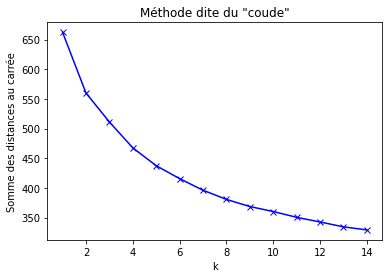

In [42]:
inerties = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(Xt)
    inerties.append(km.inertia_)

plt.plot(K, inerties, "bx-")
plt.xlabel("k")
plt.ylabel("Somme des distances au carrée")
plt.title('Méthode dite du "coude"')
plt.show()

Une option avec 4 classes pourrait être envisagée...

#### Affinity propagation

In [43]:
from sklearn.cluster import AffinityPropagation

clustering = AffinityPropagation(random_state=5).fit(Xt)
data["clusters_affinity"] = clustering.labels_

De même, si nous comparons avec notre classification précédente.

In [44]:
pd.crosstab(data["clusters"], data["clusters_affinity"])

clusters_affinity  0   1   2   3   4   5   6   7   8   9   ...  66  67  68  \
clusters                                                   ...               
Cat1               17  17  16  11   1   1   2   3   1   8  ...   8   0  13   
Cat2                0   0   0   0   7   7   4  10   0   0  ...   6   0   1   
Cat3                0   0   1   0   0   0   0   0   0   0  ...   1  15   0   

clusters_affinity  69  70  71  72  73  74  75  
clusters                                       
Cat1                4  11  12  10   0  10  30  
Cat2                0   0   1   0   5   0   0  
Cat3                0   0   0   1   0   0   0  

[3 rows x 76 columns]

Cette solution n'est pas adaptée, elle produit trop de clusters...

## 4. Analyse des données non structurées du questionnaire

Les données non-structurées peuvent être analysées d'une diversité de manière.

Dans ce cas, ce sont des réponses souvent sous la forme de liste de logiciels. Nous allons :

1. Voir la fréquence des termes utilisés
2. Identifier les profils qui utilisent Python et voir leur distribution par rapport aux catégories

In [45]:
var_libre = [
    "logiciel_production_donnees",
    "outils_nettoyage",
    "Outils_analyses",
    "Outils_visualisation",
    "outils_production_figure",
]

# Créer une nouvelle colonne qui agrège tous les textes
data["outils"] = data[var_libre].apply(
    lambda l: " ".join([u for u in l if pd.notnull(u)]), axis=1
)

data[var_libre].head()

logiciel_production_donnees outils_nettoyage  \
0                                        Lime survey              NaN   
1                                        excell word            clean   
2                                               JASP              NaN   
3  Question peu claire.  Excel, SPSS, logiciels d...              NaN   
4                                                  ?              NaN   

                         Outils_analyses Outils_visualisation  \
0  tableur pour les données statistiques                  NaN   
1                      outil statistique                  NaN   
2                                    NaN                  NaN   
3                            Excel, SPSS                  NaN   
4                                Excel r   Image j dti studii   

  outils_production_figure  
0                    aucun  
1                      NaN  
2                      ppt  
3                      NaN  
4              Ppt image j

### 4.1 Extraire les termes des réponses

Extraire tous les termes (avec la limite que des logiciels comme R sont représentés par une lettre, ou Image J en deux mots... un travail plus précis devrait identifier ces bigrammes. De nombreuses ressources permettent d'aller plus loin, par exemple : https://towardsdatascience.com/text-analysis-basics-in-python-443282942ec5)

In [46]:
# Définir une fonction qui décomposer une phrase en mots en enlevant les mots trop fréquents
def tokenizer(ligne):
    ponctuation = [".", ",", ";", "-", "\n", "(", ")", "'"]
    stopwords = [
        "de",
        "ou",
        "et",
        "des",
        "en",
        "d",
        "je",
        "par",
        "pour",
        "à",
        "logiciels",
        "pas",
        "la",
        "les",
        "données",
        "logiciel",
        "/",
    ]
    for i in ponctuation:
        ligne = ligne.replace(i, " ")
    return [i for i in ligne.lower().split(" ") if len(i) > 0 and not i in stopwords]


# Application sur la colonne
data["outils_token"] = data["outils"].apply(tokenizer)

# Construction d'un compteur
from collections import Counter

# Comptage des mots des phrases décomposés
compteur = Counter([j for i in list(data["outils_token"]) for j in i])

# Afficher les termes les plus communs
compteur.most_common(20)

[('excel', 675),
 ('r', 641),
 ('python', 417),
 ('matlab', 268),
 ('word', 213),
 ('qgis', 156),
 ('powerpoint', 154),
 ('office', 124),
 ('gimp', 119),
 ('inkscape', 118),
 ('illustrator', 116),
 ('adobe', 113),
 ('outils', 113),
 ('photoshop', 90),
 ('spss', 87),
 ('imagej', 83),
 ('origin', 79),
 ('sas', 74),
 ('gnuplot', 68),
 ('latex', 64)]

En modifiant itérativement la liste des stopwords, on peut améliorer l'identification des logiciels. Cette analyse dépasse l'objectif de ce notebook, et ouvre la voie à un traitement du langage naturel.

### 4.2 Usagers de Python et profils

Nous allons pour finir nous concentrer sur les utilisateurs de Python.

In [47]:
data["usage_python"] = data["outils_token"].apply(lambda x: "python" in x)

Il est alors possible de regarder les propriétés de ces utilisateurs de Python par rapport aux autres variables, comme les profils identifiés.

In [48]:
pyshs.tableau_croise(data, "clusters", "usage_python")

False         True        Total
Cat1   716 (93.0%)    54 (7.0%)   770 (100%)
Cat2   120 (57.4%)   89 (42.6%)   209 (100%)
Cat3    77 (70.0%)   33 (30.0%)   110 (100%)
Total  913 (83.8%)  176 (16.2%)  1089 (100%)

Clairement, il y a peu d'utilisateurs de Python dans la catégorie 1, et ils sont presque la moitié dans la catégorie 2 à utiliser ce type d'outils. Il est possible aussi de se poser la question de l'usage par rapport aux disciplines : 

In [49]:
pyshs.tableau_croise(data, "disciplines_reco", "usage_python")

False         True        Total
Chimie, Matériaux              55 (93.2%)     4 (6.8%)    59 (100%)
Mathématiques, Informatiques   93 (67.4%)   45 (32.6%)   138 (100%)
Médecine                       48 (88.9%)    6 (11.1%)    54 (100%)
Physique & Univers             55 (53.4%)   48 (46.6%)   103 (100%)
SHS                           466 (94.5%)    27 (5.5%)   493 (100%)
Science de l'ingénieur         58 (63.7%)   33 (36.3%)    91 (100%)
Sciences du vivant            125 (90.6%)    13 (9.4%)   138 (100%)
Total                         900 (83.6%)  176 (16.4%)  1076 (100%)

Clairement, les physiciens sont les plus coutumiers de l'usage de Python ; en SHS l'usage est encore à ses débuts. Mais il ne demande qu'à progresser !

## Conclusion



<div class="alert alert-block alert-info">
    
Ce Notebook présente la démarche de réanalyse de données collectées lors d'une enquête par questionnaire pour étudier les pratiques d'outils numériques des chercheurs.<br>

Il retrace les différentes étapes nécessaires d'une analyse : chargement des données, exploration, puis recodage pour formuler une question de recherche précise, et enfin la mise en oeuvre d'une analyse spécifique. Dans notre cas, il s'agit de la construction de profils de chercheurs par rapport aux réponses qu'ils ont donné.<br>
    
Pour cela il présente différentes stratégies pratiques de préparation des données, permettant de garder la trace de l'ensemble des modifications réalisées sur les données brutes.<br>
    
La construction de ces catégories reposent sur une stratégie de clusterisation relevant du machine learning. Dans ce cas, c'est une classification hiérarchique ascendante réalisé après une ACM qui permet d'identifier trois catégories.<br>
    
Les profils identifiés sont ensuite interprétés en les rapportant aux variables utilisées pour la classification, et aux variables indépendantes.<br>
    
En complément de cette analyse, il pourrait être intéressant de confronter cette typologie à d'autres regroupements (par exemple avec 4 ou 5 classes) afin de vérifier la robustesse.
</div>

Aller plus loin : pour dépasser l'objectif descriptif de l'enquête, il pourrait être intéressant de prédire l'usage de Python en fonction du profil des répondants.